In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
import os

# Bifurcation analysis
First calculating fixed points for the system

In [20]:
lambda_vals = np.linspace(0.00001, 0.5, 500)
R_vals = np.linspace(0.00001, 5, 500)
R = 2
LAMBDA = 1/5
DELTA = 1/6
BIF_VALUE_LAMBDA = 'lambda'
BIF_VALUE_R = 'R'

save_fig = True

def eq_1_solver(lambda_value=LAMBDA, lambda_bool=False, R_value=R, R_bool=False): #f < 0
    
    f = sp.symbols('f')
    if lambda_bool:
        equation = sp.Eq(lambda_value * f, R*DELTA/(DELTA-f) - 1/(1-f))
    if R_bool:
        equation = sp.Eq(LAMBDA * f, R_value*DELTA/(DELTA-f) - 1/(1-f))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0], real_solutions[1]

def eq_2_solver(lambda_value=LAMBDA, lambda_bool=False, R_value=R, R_bool=False): #f > 0
    f = sp.symbols('f')
    if lambda_bool:
        equation = sp.Eq(lambda_value * f, R*DELTA/(DELTA+f) - 1/(1+f))
    if R_bool:
        equation = sp.Eq(LAMBDA * f, R_value*DELTA/(DELTA+f) - 1/(1+f))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0]

In [21]:
f1, f2 = eq_1_solver(LAMBDA, True)
print(f1)
print(f2)

-1.06790979891806
-0.307026886053647


In [22]:
stable_bif_lambda = []
saddle_bif_lambda = []
spiral_bif_lambda = []

for i in lambda_vals:
    stable_bif_lambda.append(eq_1_solver(lambda_value=i, lambda_bool=True)[0])
    saddle_bif_lambda.append(eq_1_solver(lambda_value=i, lambda_bool=True)[1])
    spiral_bif_lambda.append(eq_2_solver(lambda_value=i, lambda_bool=True))


In [23]:
stable_bif_R = []
saddle_bif_R = []
spiral_bif_R = []

for i in R_vals:
    stable_bif_R.append(eq_1_solver(R_value=i, R_bool=True)[0])
    saddle_bif_R.append(eq_1_solver(R_value=i, R_bool=True)[1])
    spiral_bif_R.append(eq_2_solver(R_value=i, R_bool=True))

In [24]:
def find_intersection_saddle_and_stable(saddle_bif, stable_bif):
    intersection = []
    intersection_i = []
    for i in range(len(stable_bif)):
        if abs(saddle_bif[i]-stable_bif[i]) < 0.5:
            intersection.append(stable_bif[i])
            intersection_i.append(i)
    return intersection,intersection_i

intersection_lambda, intersection_lambda_i = find_intersection_saddle_and_stable(saddle_bif_lambda, stable_bif_lambda)

intersection_R, intersection_R_i = find_intersection_saddle_and_stable(saddle_bif_R, stable_bif_R)

In [25]:
print(intersection_R)

[-0.921667497127061, -0.912029407827690, -0.902029503695492, -0.891621133145043, -0.880746629093255, -0.869333280020539, -0.857287181323133, -0.844483419953431, -0.830749502389109, -0.815835287055392, -0.799352921453202, -0.780639326799931, -0.758366781980904, -0.728895793874943]


# Plotting the bifurcation diagram
I have no idea where the arrow is for the bifurcation diagram of R??

In [29]:
def make_bifurcation_diagram(values, stable_bif, saddle_bif, spiral_bif, intersection_i,intersection, lambda_):
    i = len(intersection_i)-1
    j = 1
    plt.plot(values[0:intersection_i[i]+j], stable_bif[0:intersection_i[i]+j], label='Stable node')
    plt.plot(values[0:intersection_i[i]+j], saddle_bif[0:intersection_i[i]+j], label='Saddle', linestyle='dashed')
    plt.plot(values, spiral_bif, label='Stable Spiral')

    plt.ylabel(r'equilibrium values of $f$')
    plt.ylim(-4, 1)
    if lambda_:
        bif_val = r'$\lambda$'
        BIF_VALUE = 'lambda'
        bif_val_int = 0.333800508
        plt.xlabel(f'flow resistance {bif_val}')
        plt.title(rf'$f$-equilibrium values as a function of {bif_val}')
        plt.xlim(0, 0.5)
        plt.xticks([0, 0.1, 0.2, 0.3, 0.338, 0.4, 0.5], [0.0, 0.1, 0.2, 0.3, r'$\lambda_0$', 0.4, 0.5])
    else:
        bif_val = r'$R$'
        BIF_VALUE = 'R'
        bif_val_int = 7/3
        plt.xlabel(f'Ratio of expansion coefficients {bif_val}')
        plt.title(rf'$f$-equilibrium values as a function of {bif_val}')
        plt.xlim(0, 5)
        plt.xticks([0, 1, 2, 3, bif_val_int, 4, 5], [0, 1, 2, 3, r'$R_0$', 4, 5])


    x_start = bif_val_int
    y_start = stable_bif[-1]
    x_end = bif_val_int
    y_end = spiral_bif[-1]

    arrow_props = dict(arrowstyle='->', color='k', lw=1, ls='dashed')
    plt.annotate('', xy=(x_end, y_end+0.07), xytext=(x_start, intersection[-1]),
             arrowprops=arrow_props, fontsize=9, color='k')

    plt.legend()

    folder_path = os.path.join(os.getcwd(), 'plots')
    #folder_path = os.path.join(os.path.dirname(__file__), 'plots')
    
    # Ensure the folder exists, create it if it doesn't
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Define the file name (including BIF_VALUE)
    file_name = f'bifurcation_diagram_{BIF_VALUE}.png'
    desktop_path = os.path.join(folder_path, file_name)

    if save_fig:
        plt.savefig(desktop_path, dpi=300)

    # Optionally, you can also display the saved file path
    print(f"Saved figure to: {desktop_path}")


Saved figure to: /Users/karlfindhansen/Documents/GitHub/gulf-stream-modelling/plots/bifurcation_diagram_lambda.png


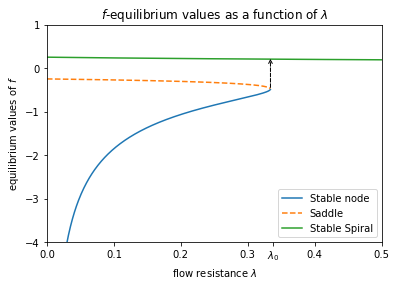

In [30]:
make_bifurcation_diagram(lambda_vals, 
                         stable_bif_lambda, 
                         saddle_bif_lambda, 
                         spiral_bif_lambda, 
                         intersection_lambda_i,
                         intersection_lambda, 
                         True)

Saved figure to: /Users/karlfindhansen/Documents/GitHub/gulf-stream-modelling/plots/bifurcation_diagram_R.png


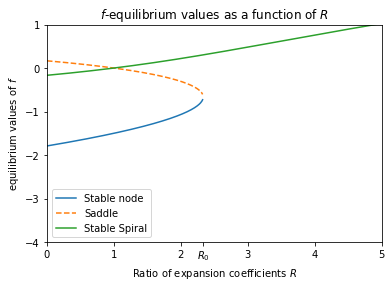

In [31]:
make_bifurcation_diagram(R_vals, 
                         stable_bif_R, 
                         saddle_bif_R, 
                         spiral_bif_R, 
                         intersection_R_i,
                         intersection_R, 
                         False)

# Using R as a bifurcation value
Is interisting because it tells us something about, the influence of the salinity of the surroundings basins.

In [ ]:
stable_bif = []
saddle_bif = []
spiral_bif = []

for i in R_vals:
    stable_bif.append(eq_1_solver(i)[0])
    saddle_bif.append(eq_1_solver(i)[1])
    spiral_bif.append(eq_2_solver(i))


In [ ]:
def find_intersection_saddle_and_stable():
    intersection = []
    intersection_i = []
    for i in range(len(stable_bif)):
        if abs(saddle_bif[i]-stable_bif[i]) < 1:
            intersection.append(stable_bif[i])
            intersection_i.append(i)
    return intersection,intersection_i

intersection, intersection_i = find_intersection_saddle_and_stable()

print(intersection)

[-1.18838206300071, -1.16320267636637, -1.13685298799913, -1.10913686098702, -1.07979569335012, -1.04847633904034, -1.01467409260775, -0.977621932906040, -0.936047005968943, -0.887524874997358, -0.826095740477676, -0.718597002190605]


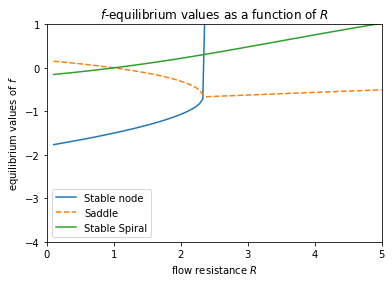

In [ ]:
def make_bifurcation_diagram():
    #i = len(intersection_i)-1
    #j = 1
   # i = len(R_vals)-10
   # j = 0

    plt.plot(R_vals, stable_bif, label='Stable node')
    plt.plot(R_vals, saddle_bif, label='Saddle', linestyle='dashed')
    plt.plot(R_vals, spiral_bif, label='Stable Spiral')

    plt.xlabel('flow resistance $R$')
    plt.ylabel(r'equilibrium values of $f$')
    plt.title(r'$f$-equilibrium values as a function of $R$')
    plt.ylim(-4, 1)
    plt.xlim(0, 5)
    #plt.xticks([0, 1, 2, 3, 4, 5], [0, 0, 0.2, 0.3, r'$R_0$', 0.4, 0.5])

    # x_start = intersection_i[i]/(10*factor)
    # y_start = stable_bif[-1]
    # x_end = intersection_i[i]/(10*factor)
    # y_end = spiral_bif[-1]

    # arrow_props = dict(arrowstyle='->', color='k', lw=1, ls='dashed')
    # plt.annotate('', xy=(x_end, y_end+0.07), xytext=(x_start, intersection[-1]),
    #          arrowprops=arrow_props, fontsize=9, color='k')

    plt.legend()
    desktop_path = f'/Users/karlfindhansen/Desktop/bifurcation_diagram_{BIF_VALUE_LAMBDA}.png'  
    if save_fig:
        plt.savefig(desktop_path, dpi=300)
    return plt.show()


make_bifurcation_diagram()


# Find bifurcation value
Did it in maple already, but this would be nicer! It just takes a very long time to run.

Maybe you can try on your stationary computer?

In [ ]:

DELTA = 1/6
R = 2
lambda_val, f = sp.symbols('lambda f')

eq1 = sp.Eq(lambda_val * f, R * DELTA / (DELTA - f) - 1 / (1 - f))

solutions = sp.solve(eq1, f)
sol1 = solutions[0]  
sol2 = solutions[1]  


In [ ]:
# Solve for lambda where sol1 = sol2
lambda_solutions = sp.solve(sp.Eq(sol1, sol2), lambda_val)

In [ ]:
# Find the real part of the first lambda solution
real_lambda = sp.re(lambda_solutions[0])

# Evaluate the result
result = sp.N(real_lambda)  # Convert to a numeric value

print(result)